# Part 1: Imports, data uploads and preparation.

As is customary, let us first call the Python libraries needed here, and upload the needed data and code.

In [1]:
from model import setup, balance_calcs, dynamic_programming, visuals, performance
import pandas as pd
import numpy as np
import datetime

## Loading model and water balance for historical data

In this tutorial we will compute performance, then compare it for the scenarios defined in Tutorial 3. First let's compute the historical water balance.

In [4]:
# Preparing the model
reservoir_name = 'Conowingo'
downstream_demand_names = ['Environmental']
direct_demand_names = ['Baltimore', 'Chester', 'Nuclear plant']

# Loading the model!
conowingo = setup.define_reservoir(reservoir_name, downstream_demand_names, direct_demand_names)

# Read flow and demand data. We keep this copy of the data for the simulation of different futures.
flows_default = setup.extract_flows(reservoir=conowingo)
display(flows_default)

,Total inflows (m3/s),Baltimore demand (m3/s),Chester demand (m3/s),Nuclear plant demand (m3/s),Environmental demand (m3/s)
Date,,,,,
1932-01-01,557.049006,13.139017,1.472476,0.622971,99.108963
1932-01-02,638.488257,13.139017,1.472476,0.622971,99.108963
1932-01-03,758.806538,13.139017,1.472476,0.622971,99.108963
1932-01-04,824.048553,13.139017,1.472476,0.622971,99.108963
1932-01-05,780.383975,13.139017,1.472476,0.622971,99.108963
...,...,...,...,...,...
2001-12-27,775.966547,13.139017,1.444159,0.651287,99.108963
2001-12-28,716.529486,13.139017,1.444159,0.651287,99.108963
2001-12-29,668.362530,13.139017,1.444159,0.651287,99.108963


In [6]:
# First, make a copy of the flows to initialise the water balance
sop_balance = flows_default.copy()  # Keep flows_default as an untouched copy

# Computing the water balance for our standard operating policy (SOP)
balance_calcs.sop_full(reservoir=conowingo, water_flows=sop_balance)

,Total inflows (m3/s),Baltimore demand (m3/s),Chester demand (m3/s),Nuclear plant demand (m3/s),Environmental demand (m3/s),Withdrawals Baltimore (m3/s),Withdrawals Chester (m3/s),Withdrawals Nuclear plant (m3/s),Release (m3/s),Storage (m3)
Date,,,,,,,,,,
1932-01-01,557.049006,13.139017,1.472476,0.622971,99.108963,13.139017,1.472476,0.622971,101.999728,380000000.0
1932-01-02,638.488257,13.139017,1.472476,0.622971,99.108963,13.139017,1.472476,0.622971,623.253793,380000000.0
1932-01-03,758.806538,13.139017,1.472476,0.622971,99.108963,13.139017,1.472476,0.622971,743.572075,380000000.0
1932-01-04,824.048553,13.139017,1.472476,0.622971,99.108963,13.139017,1.472476,0.622971,808.814089,380000000.0
1932-01-05,780.383975,13.139017,1.472476,0.622971,99.108963,13.139017,1.472476,0.622971,765.149512,380000000.0
...,...,...,...,...,...,...,...,...,...,...
2001-12-27,775.966547,13.139017,1.444159,0.651287,99.108963,13.139017,1.444159,0.651287,760.732084,380000000.0
2001-12-28,716.529486,13.139017,1.444159,0.651287,99.108963,13.139017,1.444159,0.651287,701.295023,380000000.0
2001-12-29,668.362530,13.139017,1.444159,0.651287,99.108963,13.139017,1.444159,0.651287,653.128067,380000000.0


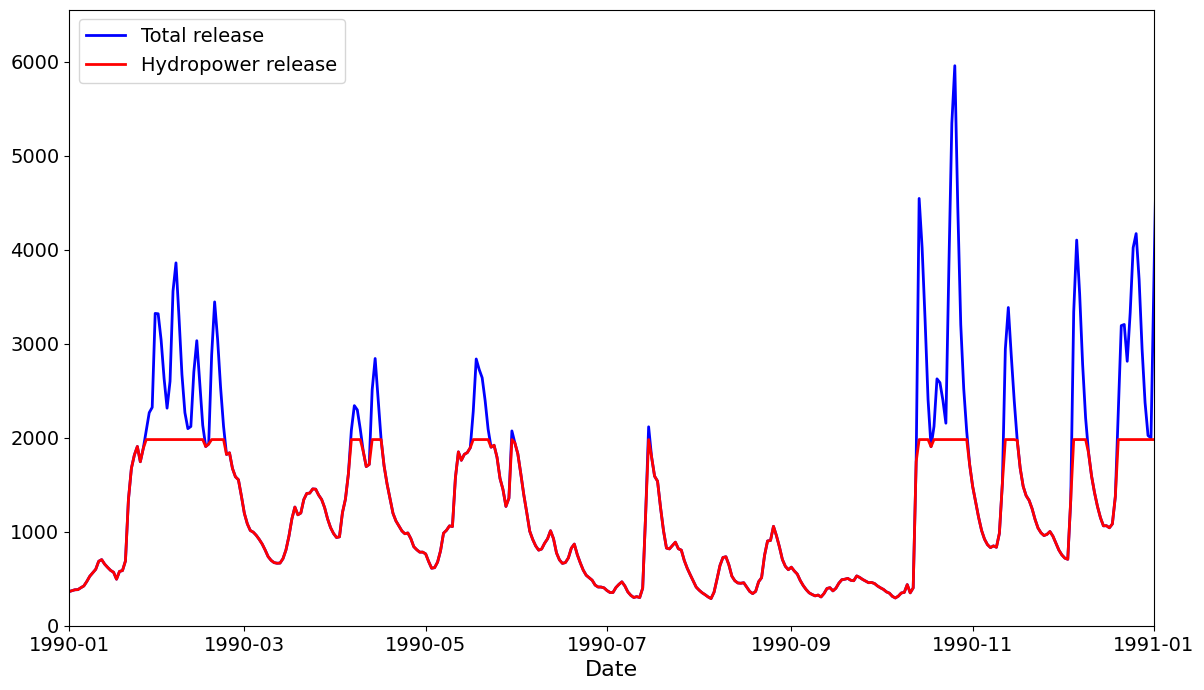

In [8]:
# Let us create a time series of hydropower releases
sop_hp_release = np.minimum(sop_balance['Release (m3/s)'].values, np.ones(len(sop_balance))*conowingo.hydropower_plant.max_release)

# We plot hydropower releases vs. total releases. What do we see?
fig = visuals.compare_flow_timeseries(reference=pd.Series(sop_balance['Release (m3/s)']),
                                      alternative=pd.Series(sop_hp_release, index=sop_balance.index),
                                      labels=['Total release', 'Hydropower release'], 
                                      first_date=datetime.date(1990, 1, 1), 
                                      last_date=datetime.date(1991, 1, 1))

**Question 1. What is the extra release? What does that mean for hydropower production?**

# Part 2: Optimizing hydropower production

Now we try to maximise hydropower production. Let us write a dynamic program to achieve this!

For this we need some building blocks. First, let's have a function that calculates value of a (release) decision that leads to a future (storage) state, below.

In [ ]:
# First we use the backward function to go backward from the final time step to the initial time step.
tables = ddp_hp_backward(conowingo, flows_default, 1989, 11, 10)

hp_max_balance = ddp_forward(conowingo, flows_default, 1989, tables[0])
display(hp_max_balance)

In [ ]:
fig = visuals.compare_flow_timeseries(reference=pd.Series(sop_balance['Release (m3/s)']),
                                      alternative=pd.Series(hp_max_balance['Release (m3/s)']),
                                      labels=['SOP release', 'Release for max hydropower'], 
                                      first_date=datetime.date(1989, 1, 1), 
                                      last_date=datetime.date(1990, 12, 31))

In [ ]:
fig = visuals.compare_storage_timeseries(reservoir=conowingo, storage_1=pd.Series(sop_balance['Storage (m3)']),
                                      storage_2=pd.Series(hp_max_balance['Storage (m3)']),
                                      labels=['SOP release', 'Release for max hydropower'], 
                                      first_date=datetime.date(1989, 1, 1), 
                                      last_date=datetime.date(1990, 12, 31))

# Part 3: Another optimization

In [ ]:
# Success condition: enough water. This corresponds to the demand with the shallowest intake being met
    shallowest_intake_depth = reservoir.total_lake_depth
    dem_nb = 0
    for d in range(len(reservoir.demand_on_site)):
        shallowest_intake_depth = min(shallowest_intake_depth, reservoir.demand_on_site[d].intake_depth)
        if shallowest_intake_depth == reservoir.demand_on_site[d].intake_depth:
            dem_nb = d

    # Associated volume
    threshold_volume = reservoir.volume_from_height(reservoir.total_lake_depth - reservoir.demand_on_site[dem_nb].intake_depth)

In [ ]:
def ddp_rel_backward(reservoir, water_flows, first_year, nb_states, nb_decisions):

    # Parameters
    n_sec = 86400  # Number of seconds in a day (the time step)

    # Success condition: enough water. This corresponds to the demand with the shallowest intake being met
    shallowest_intake_depth = reservoir.total_lake_depth
    dem_nb = 0
    for d in range(len(reservoir.demand_on_site)):
        shallowest_intake_depth = min(shallowest_intake_depth, reservoir.demand_on_site[d].intake_depth)
        if shallowest_intake_depth == reservoir.demand_on_site[d].intake_depth:
            dem_nb = d

    # Associated volume
    threshold_volume = reservoir.volume_from_height(reservoir.total_lake_depth - reservoir.demand_on_site[dem_nb].intake_depth)

    # Discretisation on whole storage range
    storage_mesh = pd.Series(reservoir.dead_storage + np.arange(0, nb_states) / (nb_states - 1) *
                             (reservoir.full_lake_volume - reservoir.dead_storage))

    # Initialise water balance
    time_mask = (water_flows.index.year >= first_year) & (water_flows.index.year < first_year + 2)
    h2o_balance = water_flows.iloc[time_mask, :].copy()
    total_local_demands = balance_calcs.local_demand_init(reservoir, h2o_balance, n_sec)
    total_downstream_demands = balance_calcs.downstream_demand_init(reservoir, h2o_balance, n_sec)

    # Score table
    failure_table = np.zeros((len(h2o_balance) + 1, nb_states))

    # Release table
    release_table = np.zeros((len(h2o_balance), nb_states))

    # Backward loop
    for t in np.arange(len(h2o_balance) - 1, -1, -1):

        # At each time step, loop on states
        for s in range(nb_states):

            # Start with SOP. We will only increase storage if no failure
            wb_sop = balance_calcs.sop_single_step(reservoir, storage_mesh[s],
                                                   h2o_balance.loc[h2o_balance.index[t], 'Total inflows (m3/s)']*n_sec,
                                                   total_local_demands[t], total_downstream_demands[t])
            st_max = wb_sop[0]
            release_min = wb_sop[1]

            # Check success
            # Success because enough water for all demands
            success = wb_sop[2][dem_nb] + 1E-6 > h2o_balance.loc[h2o_balance.index[t], reservoir.demand_on_site[dem_nb].name + ' demand (m3/s)'] * n_sec
            # No spillage, i.e., release smaller than max release?
            failure = 1 - int(success == True) * int(wb_sop[1] < reservoir.hydropower_plant.max_release * n_sec + 1E-6)

            # Increase release if success is true
            if failure == 0:
                # Minimal end-of-step storage if release is maximal useful value for hydropower
                # (lower bound dead storage)
                st_min = max(st_max + release_min - reservoir.hydropower_plant.max_release * n_sec, threshold_volume)
                # CORRECT THIS IT's EXTREME
                # No failure in the current state hence the current values
                current_value = np.zeros(nb_decisions)
                # Release decisions for each storage value
                x = decision_taking(current_value, failure_table[t+1], st_min, st_max, storage_mesh, True, nb_decisions)
                storage_decision = st_min + (x[0] / (nb_decisions-1)) * (st_max-st_min)
                release_table[t, s] = release_min + st_max - storage_decision  # Release decision
                failure_table[t, s] = x[1]
            else:
                # If it's a failure we don't increase release
                release_table[t, s] = wb_sop[1]
                failure_table[t, s] = ddp_value(immediate_value=failure, future_state=st_max,
                                                future_value=failure_table[t + 1], mesh=storage_mesh)

    return release_table, failure_table

In [ ]:
tables_rel = ddp_rel_backward(conowingo, flows_default, 1989, 21, 10)
rel_balance = ddp_forward(conowingo, flows_default, 1989, tables_rel[0])
display(rel_balance)

In [ ]:
fig = visuals.compare_flow_timeseries(reference=pd.Series(sop_balance['Release (m3/s)']),
                                      alternative=pd.Series(rel_balance['Release (m3/s)']),
                                      labels=['SOP release', 'Release for max hydropower'], 
                                      first_date=datetime.date(1989, 1, 1), 
                                      last_date=datetime.date(1990, 12, 31))

In [ ]:
fig = visuals.compare_storage_timeseries(reservoir=conowingo, storage_1=pd.Series(sop_balance['Storage (m3)']),
                                      storage_2=pd.Series(rel_balance['Storage (m3)']),
                                      labels=['SOP release', 'Release for max hydropower'], 
                                      first_date=datetime.date(1989, 1, 1), 
                                      last_date=datetime.date(1990, 12, 31))

In [ ]:
metrics_2 = performance.all_metrics(conowingo, rel_balance)
display(metrics_2)

In [ ]:
metrics_1 = performance.all_metrics(conowingo, sop_balance.loc[datetime.date(1989, 1, 1):datetime.date(1990, 12, 31), :])
display(metrics_1)